# Deep learning framework example: Movie Review Dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.

Before you run this notebook, you must ensure the corpus is installed.  Please see the `README.md` file for more information.

**Important**: Please see the Iris notebook example in the `zensols.deeplearn` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# set up notebook environment
import sys
app_root_dir = '..'
sys.path.append(app_root_dir + '/src')
# add the deepnlp path
sys.path.append('../../../src/python')

## Configure and create the app specific facade

Now that the interpreter environment is set up, we can import local packages.

In [2]:
import logging
from zensols.config import ImportConfigFactory
from zensols.deeplearn import TorchConfig
from movie import AppConfig, ReviewModelFacade

# set the random seed so things are predictable
TorchConfig.set_random_seed()

# configure the environment
config = AppConfig(config_file=app_root_dir + '/resources/movie.conf', env={'app_root': app_root_dir})

def create_facade():
    """Create and return a facade with columns that fit a notebook.
 
    """
    # create a factoty that instantiates Python objects using a simple configuration (INI)
    facade = ReviewModelFacade(config)
    # set console based logging
    facade.configure_jupyter(logging.WARNING)
    return facade

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [3]:
from zensols.config import Writable
# set indention level for human readable (pretty print like) output
Writable.WRITABLE_INDENT_SPACE = 2
facade = create_facade()
facade.write()

executor:
  model: Review
  feature splits:
    split stash splits:


2020-12-07 06:50:07,761[INFO]zensols.multi.stash: feature_factory_stash: spawning work with chunk size 1402 across 8 workers


        dev: 1029 (9.2%)
        test: 2099 (18.7%)
        train: 8086 (72.1%)
        total: 11214


2020-12-07 06:50:07,884[INFO]zensols.multi.stash: factory inst feature_factory_stash for chunk 1 in 0s
2020-12-07 06:50:07,887[INFO]zensols.multi.stash: processing chunk 1 with stash <class 'movie.domain.ReviewFeatureStash'>
2020-12-07 06:50:07,885[INFO]zensols.multi.stash: factory inst feature_factory_stash for chunk 0 in 0s
2020-12-07 06:50:07,888[INFO]zensols.multi.stash: factory inst feature_factory_stash for chunk 3 in 0s
2020-12-07 06:50:07,888[INFO]zensols.multi.stash: processing chunk 0 with stash <class 'movie.domain.ReviewFeatureStash'>
2020-12-07 06:50:07,894[INFO]zensols.multi.stash: factory inst feature_factory_stash for chunk 4 in 0s
2020-12-07 06:50:07,890[INFO]zensols.multi.stash: processing chunk 3 with stash <class 'movie.domain.ReviewFeatureStash'>
2020-12-07 06:50:07,890[INFO]zensols.multi.stash: factory inst feature_factory_stash for chunk 2 in 0s
2020-12-07 06:50:07,896[INFO]zensols.multi.stash: factory inst feature_factory_stash for chunk 5 in 0s
2020-12-07 06:50

    total this instance: 11214
    keys consistent: True
  batch splits:
    split stash splits:
        dev: 6 (10.3%)
        test: 11 (19.0%)
        train: 41 (70.7%)
        total: 58


2020-12-07 06:50:42,757[INFO]zensols.multi.stash: factory inst batch_stash for chunk 0 in 0s
2020-12-07 06:50:42,759[INFO]zensols.multi.stash: processing chunk 0 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2020-12-07 06:50:42,759[INFO]zensols.multi.stash: factory inst batch_stash for chunk 1 in 0s
2020-12-07 06:50:42,761[INFO]zensols.multi.stash: factory inst batch_stash for chunk 2 in 0s
2020-12-07 06:50:42,761[INFO]zensols.multi.stash: processing chunk 1 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2020-12-07 06:50:42,762[INFO]zensols.multi.stash: processing chunk 2 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2020-12-07 06:50:43,023[INFO]zensols.deepnlp.embed.wordtext: reading binary vector file: ../corpus/glove/bin/6B.300/vec
2020-12-07 06:50:43,124[INFO]zensols.deepnlp.embed.wordtext: reading binary vector file: ../corpus/glove/bin/6B.300/vec
2020-12-07 06:50:43,125[INFO]zensols.deepnlp.embed.wordtext: reading binary vector file:

    total this instance: 58
    keys consistent: True
    delegate:
      name: batch_stash
      chunk_size: 0
      workers: 3
      batch_size: 200
      data_point_id_sets_path: ../data/batch/batch-point-keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'label', 'glove_50_embedding'}
      priming: False
  network settings:
    name: net_settings
    dropout: 0.2
    recurrent_settings:
      name: recurrent_settings
      dropout: 0.2
      network_type: lstm
      aggregation: max
      bidirectional: True
      hidden_size: 36
      num_layers: 1
    linear_settings:
      name: linear_settings
      dropout: 0.2
      out_features: 2
      middle_features:
        10
      proportions: True
      repeats: 1
  model settings:
    name: model_settings
    path: ../target/model
    learning_rate: 0.001
    epochs: 3
    max_consecutive_increased_count: 9223372036854775807
    nominal_la

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

2020-12-07 06:53:19,866[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-07 06:53:19,867[INFO]zensols.deeplearn.model.facade: training...
2020-12-07 06:53:19,869[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2020-12-07 06:53:24,113[INFO]zensols.deeplearn.model.executor.status: loaded 47 batches in 4s
2020-12-07 06:53:24,113[INFO]zensols.deeplearn.model.executor.status: train/test sets: 41 6
2020-12-07 06:53:24,117[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2020-12-07 06:53:24,135[INFO]zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 2 epochs using learning rate 0.001
  0%|                                                                                             | 0/2 [00:00<?, ?it/s]2020-12-07 06:53:24,139[INFO]zensols.deeplearn.model.executor.status: watching update file

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 12/07/2020 06:53:24:139978
    ended: 12/07/2020 06:53:26:505201
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 2/2
    ave/min loss: 164.23752/54.03560
    accuracy: 0.171 (1382/8086)
    micro: F1: 0.171, precision: 0.171, recall: 0.171
    macro: F1: 0.171, precision: 0.171, recall: 0.171
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 2/2
    ave/min loss: 119.60986/17.29031
    accuracy: 0.498 (512/1029)
    micro: F1: 0.498, precision: 0.498, recall: 0.498
    macro: F1: 0.332, precision: 0.249, recall: 0.500
  test:
    started: 12/07/2020 06:53:26:843722
    ended: 12/07/2020 06:53:26:896608
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 132.75834/59.75591
    accuracy: 0.507 (1064/2099)
    micro: F1: 0.507, precision: 0.507, recall: 0.507
    macro: F1: 0.336, precision: 0.253, recall: 0.5

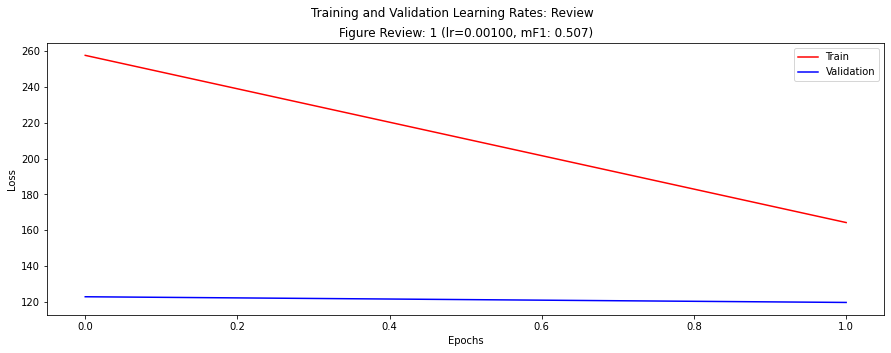

In [4]:
facade.epochs = 2
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
facade.persist_result()

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.

2020-12-07 06:53:27,417[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-07 06:53:27,418[INFO]zensols.deeplearn.model.facade: training...
2020-12-07 06:53:27,419[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2020-12-07 06:53:27,420[INFO]zensols.deeplearn.model.executor.status: train/test sets: 41 6
2020-12-07 06:53:27,459[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2020-12-07 06:53:27,480[INFO]zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 70 epochs using learning rate 0.001
  0%|                                                                                            | 0/70 [00:00<?, ?it/s]2020-12-07 06:53:27,482[INFO]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:116.049|va min:92.704|va:92.880 /\: 100%|██████████████████████████

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 12/07/2020 06:53:27:483120
    ended: 12/07/2020 06:55:02:177992
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 69/70
    ave/min loss: 114.80566/26.73229
    accuracy: 0.682 (5515/8086)
    micro: F1: 0.682, precision: 0.682, recall: 0.682
    macro: F1: 0.682, precision: 0.682, recall: 0.682
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 66/70
    ave/min loss: 92.70416/12.40205
    accuracy: 0.733 (754/1029)
    micro: F1: 0.733, precision: 0.733, recall: 0.733
    macro: F1: 0.731, precision: 0.741, recall: 0.733
  test:
    started: 12/07/2020 06:55:02:728880
    ended: 12/07/2020 06:55:02:782973
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 106.68747/45.11142
    accuracy: 0.709 (1489/2099)
    micro: F1: 0.709, precision: 0.709, recall: 0.709
    macro: F1: 0.706, precision: 0.718, recall: 

movie.model.ReviewNetwork (2)

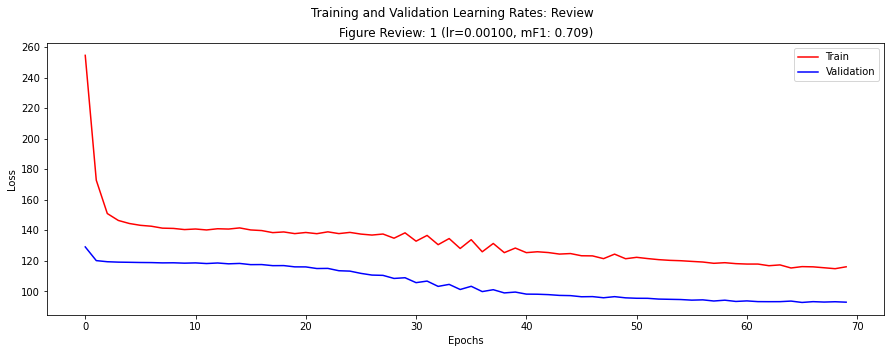

In [5]:
facade.learning_rate = 0.001
facade.epochs = 70
facade.dropout = 0.3
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2020-12-07 06:55:03,053[INFO]zensols.deepnlp.embed.word2vec: reading binary vector file
2020-12-07 06:55:03,054[INFO]zensols.deepnlp.embed.word2vec: loading keyed file: ../corpus/word2vec/GoogleNews-vectors-negative300.bin
2020-12-07 06:56:58,456[INFO]zensols.deepnlp.embed.word2vec: loaded key model from /home/landes/view/nlp/deepnlp/example/movie/notebook/../corpus/word2vec/GoogleNews-vectors-negative300.bin in 1 minute, 55s
2020-12-07 06:56:58,457[INFO]zensols.deepnlp.embed.word2vec: loaded word2vec model in 1 minute, 55s
2020-12-07 06:57:10,460[INFO]zensols.deepnlp.embed.word2vec: created data structures in 12s
2020-12-07 06:57:12,966[INFO]zensols.deepnlp.embed.domain: created tensor vectory matrix on use cuda: False, device: cpu
2020-12-07 06:57:13,601[INFO]zensols.deeplearn.model.facade: clearing
2020-12-07 06:57:14,205[INFO]zensols.deeplearn.model.facade: creating new executor
2020-12-07 06:57:14,211[INFO]zensols.deepnlp.embed.domain: reusing already cached from use cuda: False, 

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 12/07/2020 06:57:19:892306
    ended: 12/07/2020 06:58:30:986992
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 59/60
    ave/min loss: 84.70927/12.36827
    accuracy: 0.796 (6438/8086)
    micro: F1: 0.796, precision: 0.796, recall: 0.796
    macro: F1: 0.796, precision: 0.797, recall: 0.796
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 45/60
    ave/min loss: 84.42555/9.85696
    accuracy: 0.761 (783/1029)
    micro: F1: 0.761, precision: 0.761, recall: 0.761
    macro: F1: 0.760, precision: 0.764, recall: 0.761
  test:
    started: 12/07/2020 06:58:35:017113
    ended: 12/07/2020 06:58:35:071778
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 90.91064/37.50360
    accuracy: 0.772 (1621/2099)
    micro: F1: 0.772, precision: 0.772, recall: 0.772
    macro: F1: 0.770, precision: 0.781, recall: 0.7

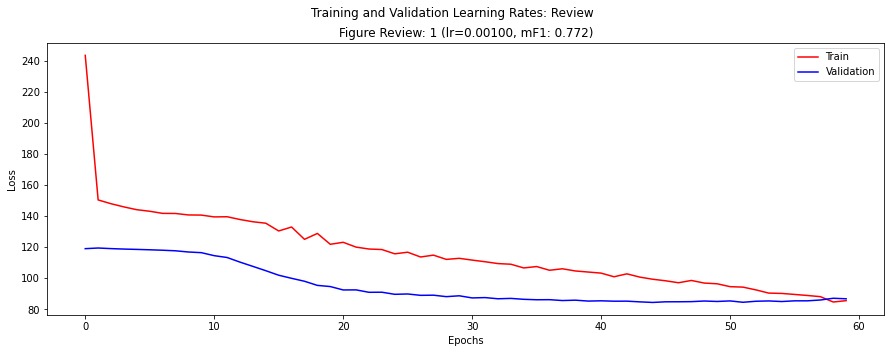

In [6]:
facade.epochs = 60
facade.embedding = 'word2vec_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
facade.persist_result()

2020-12-07 06:58:58,506[INFO]zensols.deeplearn.model.facade: clearing
2020-12-07 06:58:58,515[INFO]zensols.deeplearn.model.facade: creating new executor
2020-12-07 06:58:58,547[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-07 06:58:58,548[INFO]zensols.deeplearn.model.facade: training...
2020-12-07 06:58:58,562[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2020-12-07 07:01:10,088[INFO]zensols.deeplearn.model.executor.status: loaded 47 batches in 2 minutes, 11s
2020-12-07 07:01:10,090[INFO]zensols.deeplearn.model.executor.status: train/test sets: 41 6
2020-12-07 07:01:10,094[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2020-12-07 07:01:10,095[INFO]zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 100 epochs using learning rate 0.001
  0%|                                      

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 12/07/2020 07:01:10:098740
    ended: 12/07/2020 07:03:00:739170
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 100/100
    ave/min loss: 11.97289/6.95488
    accuracy: 0.957 (7739/8086)
    micro: F1: 0.957, precision: 0.957, recall: 0.957
    macro: F1: 0.957, precision: 0.961, recall: 0.957
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 34/100
    ave/min loss: 67.18978/7.63751
    accuracy: 0.821 (845/1029)
    micro: F1: 0.821, precision: 0.821, recall: 0.821
    macro: F1: 0.820, precision: 0.831, recall: 0.822
  test:
    started: 12/07/2020 07:03:31:204538
    ended: 12/07/2020 07:03:31:264116
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 80.20508/30.05085
    accuracy: 0.814 (1708/2099)
    micro: F1: 0.814, precision: 0.814, recall: 0.814
    macro: F1: 0.811, precision: 0.830, recall: 0

movie.model.ReviewNetwork (2)

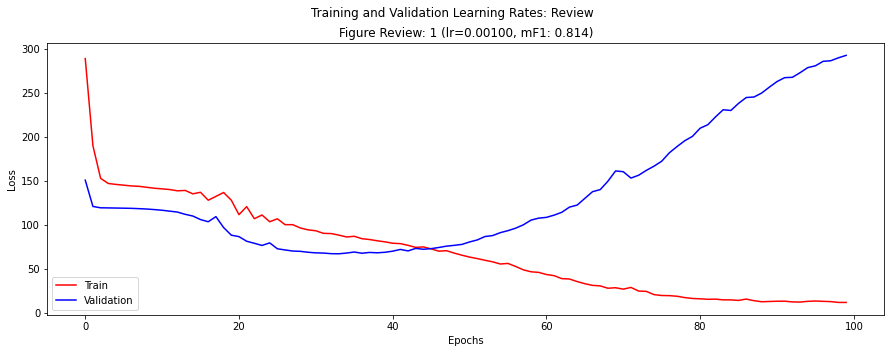

In [7]:
facade.epochs = 100
facade.embedding = 'bert_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()